## packages

In [ ]:
!pip install -q -U openmim
!mim install -q mmengine
!mim install -q mmcv
!mim install -q mmdet
!mim install -q mmocr
!pip install -q albumentations>=1.1.0 --no-binary qudida,albumentations (optional)

In [ ]:
!mkdir train

In [ ]:
!mkdir val

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from mmocr.apis import MMOCRInferencer

In [ ]:
import os
import json

## data

In [ ]:
!ls -1 train | wc -l

771


In [ ]:
!ls -1 val | wc -l

93


In [ ]:
imgs = !ls -1 val | head -n 1

In [ ]:
imgs

['____0659.jpg']

In [ ]:
img = 'val/' + imgs[0]

In [ ]:
img

'val/____0659.jpg'

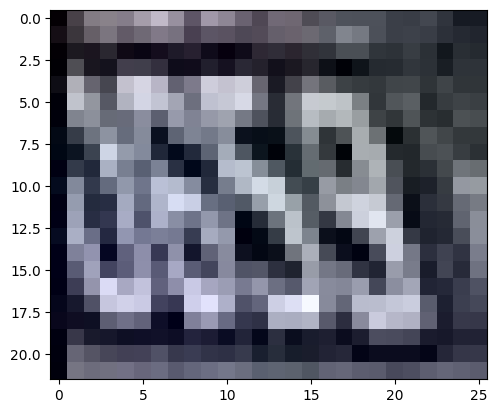

In [ ]:
plt.imshow(mpimg.imread(img))

## inference

In [ ]:
ocr = MMOCRInferencer(det='DBNet', rec='CRNN')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textdet/dbnet/dbnet_resnet50-oclip_1200e_icdar2015/dbnet_resnet50-oclip_1200e_icdar2015_20221102_115917-bde8c87a.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/crnn/crnn_mini-vgg_5e_mj/crnn_mini-vgg_5e_mj_20220826_224120-8afbedbb.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [ ]:
ocr = MMOCRInferencer(rec='CRNN')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmocr/textrecog/crnn/crnn_mini-vgg_5e_mj/crnn_mini-vgg_5e_mj_20220826_224120-8afbedbb.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



In [ ]:
# Perform inference
result = ocr(img)

Output()

In [ ]:
result

{'predictions': [{'rec_texts': ['es'], 'rec_scores': [0.5939849019050598]}],
 'visualization': []}

In [ ]:
img

## dataset

In [ ]:
# Path to your image folder
image_folder = '/content/train'

# Output annotation file
ann_file = '/content/labels_train.json'

# Get a list of all images in the folder
images = os.listdir(image_folder)

# Initialize an empty list to hold the annotations
annotations = []

# Iterate over all images
for image in images:
    # Get the label from the image filename
    label = os.path.splitext(image)[0]

    # Create an annotation entry
    entry = {
        'file_name': image,
        'text': label,
    }

    # Add the entry to the list of annotations
    annotations.append(entry)

# Write the annotations to a JSON file
with open(ann_file, 'w') as f:
    json.dump(annotations, f)


In [ ]:
# Path to your image folder
image_folder = '/content/val'

# Output annotation file
ann_file = '/content/labels_val.json'

# Get a list of all images in the folder
images = os.listdir(image_folder)

# Initialize an empty list to hold the annotations
annotations = []

# Iterate over all images
for image in images:
    # Get the label from the image filename
    label = os.path.splitext(image)[0]

    # Create an annotation entry
    entry = {
        'file_name': image,
        'text': label,
    }

    # Add the entry to the list of annotations
    annotations.append(entry)

# Write the annotations to a JSON file
with open(ann_file, 'w') as f:
    json.dump(annotations, f)


## config

custom dataset config

In [ ]:
dataset_train = dict(
    type='OCRDataset',
    data_root='/content/train',               # dataset root path
    ann_file='labels_train.json',                       # name of annotation
    filter_cfg=dict(filter_empty_gt=True, min_size=32),  # filtering empty images
    pipeline=None)

# Test set config
dataset_val = dict(
    type='OCRDataset',
    data_root='/content/val',
    ann_file='labels_val.json',
    test_mode=True,
    pipeline=None)

In [ ]:
!touch /content/dataset_config.py

In [ ]:
_base_ = [
    '_base_aster.py',
    '/content/dataset_config.py',  # import the dataset config
    '../_base_/default_runtime.py',
    '../_base_/schedules/schedule_adamw_cos_6e.py',
]

dataset_train

In [ ]:
_base_ = [
    '_base_dbnet_r18_fpnc.py',
    '../_base_/datasets/icdar2015.py',  # import the dataset config
    '../_base_/default_runtime.py',
    '../_base_/schedules/schedule_sgd_1200e.py',
]

icdar2015_textdet_train = _base_.icdar2015_textdet_train            # specify the training set
icdar2015_textdet_train.pipeline = _base_.train_pipeline   # specify the training pipeline
icdar2015_textdet_test = _base_.icdar2015_textdet_test              # specify the testing set
icdar2015_textdet_test.pipeline = _base_.test_pipeline     # specify the testing pipeline

train_dataloader = dict(
    batch_size=16,
    num_workers=8,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=icdar2015_textdet_train)    # specify the dataset in train_dataloader

val_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=icdar2015_textdet_test)    # specify the dataset in val_dataloader

test_dataloader = val_dataloader

In [ ]:
_base_ = [
    '/content/mmocr/configs/textrecog/aster/_base_aster.py',
    '/content/mmocr/configs/textrecog/_base_/default_runtime.py',
    '/content/mmocr/configs/textrecog/_base_/schedules/schedule_adamw_cos_6e.py',
]

dataset_train = dict(
    type='OCRDataset',
    data_root='/content/train',               # dataset root path
    ann_file='labels_train.json',                       # name of annotation
    filter_cfg=dict(filter_empty_gt=True, min_size=32),  # filtering empty images
    pipeline=None)

# Test set config
dataset_val = dict(
    type='OCRDataset',
    data_root='/content/val',
    ann_file='labels_val.json',
    test_mode=True,
    pipeline=None)

train_dataloader = dict(
    batch_size=16,
    num_workers=8,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=dataset_train)    # specify the dataset in train_dataloader

val_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=dataset_val)    # specify the dataset in val_dataloader

test_dataloader = val_dataloader

auto_scale_lr = dict(base_batch_size=1024)

# val_evaluator = dict(
#     dataset_prefixes=['CUTE80', 'IIIT5K', 'SVT', 'SVTP', 'IC13', 'IC15'])
# test_evaluator = val_evaluator

# default_hooks = dict(logger=dict(type='LoggerHook', interval=50))

base

In [ ]:
# training schedule for 1x
_base_ = [
    '_base_aster.py',
    '../_base_/datasets/mjsynth.py',
    '../_base_/datasets/synthtext.py',
    '../_base_/datasets/cute80.py',
    '../_base_/datasets/iiit5k.py',
    '../_base_/datasets/svt.py',
    '../_base_/datasets/svtp.py',
    '../_base_/datasets/icdar2013.py',
    '../_base_/datasets/icdar2015.py',
    '../_base_/default_runtime.py',
    '../_base_/schedules/schedule_adamw_cos_6e.py',
]

# dataset settings
train_list = [
    _base_.mjsynth_textrecog_train,
    _base_.synthtext_textrecog_train,
]
test_list = [
    _base_.cute80_textrecog_test, _base_.iiit5k_textrecog_test,
    _base_.svt_textrecog_test, _base_.svtp_textrecog_test,
    _base_.icdar2013_textrecog_test, _base_.icdar2015_textrecog_test
]

default_hooks = dict(logger=dict(type='LoggerHook', interval=50))

train_dataset = dict(
    type='ConcatDataset', datasets=train_list, pipeline=_base_.train_pipeline)
test_dataset = dict(
    type='ConcatDataset', datasets=test_list, pipeline=_base_.test_pipeline)


train_dataloader = dict(
    batch_size=1024,
    num_workers=24,
    persistent_workers=True,
    pin_memory=True,
    sampler=dict(type='DefaultSampler', shuffle=True),
    dataset=train_dataset)

auto_scale_lr = dict(base_batch_size=1024)

test_dataloader = dict(
    batch_size=1,
    num_workers=4,
    persistent_workers=True,
    pin_memory=True,
    drop_last=False,
    sampler=dict(type='DefaultSampler', shuffle=False),
    dataset=test_dataset)

val_dataloader = test_dataloader

val_evaluator = dict(
    dataset_prefixes=['CUTE80', 'IIIT5K', 'SVT', 'SVTP', 'IC13', 'IC15'])
test_evaluator = val_evaluator


model

## train

aster (меняет перспективу) vs модель с modelscope обучить на crops

In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git

Cloning into 'mmocr'...
remote: Enumerating objects: 16384, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 16384 (delta 102), reused 206 (delta 62), pack-reused 16091
Receiving objects: 100% (16384/16384), 16.28 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (10711/10711), done.


In [ ]:
%cd /content

/content


In [ ]:
!ls

CITATION.cff  demo    LICENSE	       my_config.py	requirements	  setup.py
config.py     dicts   MANIFEST.in      projects		requirements.txt  tests
configs       docker  mmocr	       README.md	resources	  tools
dataset_zoo   docs    model-index.yml  README_zh-CN.md	setup.cfg


In [ ]:
%cd /content/mmocr/configs/textrecog/aster

/content/mmocr/configs/textrecog/aster


In [ ]:
!ls

aster_resnet45_6e_st_mj.py  _base_aster.py  metafile.yml  README.md


In [ ]:
# !touch my_config.py

In [ ]:
!ls

aster_resnet45_6e_st_mj.py  _base_aster.py  metafile.yml  my_config.py	README.md


In [ ]:
!python /content/mmocr/tools/train.py /content/config.py